In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output

# supress warnings
import warnings
warnings.filterwarnings('ignore')

['mnist_train.csv', 'mnist_test.csv']


# ANDRE OFSOSKI 1314669
# REECE BREEBAART 1314828

In [39]:
# store data in variables
test = pd.read_csv('../input/mnist_test.csv')

x_test = test.drop('label', axis=1)
y_test = test['label']

train = pd.read_csv('../input/mnist_train.csv', dtype=int)
X_train = train.drop('label', axis=1)
y_train = train['label']

X_train = np.array(X_train)
x_test = np.array(x_test)

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
import itertools

max_depth = [10,20,30,40,50,60]

def grid_search(CLF, X_train, y_train, n):
    highest_oob = 0;
    highest_depth = 0;
    for c in max_depth:
        clf = CLF(n_estimators=n, max_depth=c, n_jobs=-1, oob_score=True, bootstrap=True, random_state=1314669)
        clf.fit(X_train, y_train)

        oob = clf.oob_score_        
        if oob >= highest_oob:
            highest_oob = oob
            highest_depth = c

      
        # print max_depth, max_features, and oob score
        print ("OOB score: ",oob," Max Depth: ",c)
    print ("***** Highest OOB score:",highest_oob," Max Depth: ",highest_depth," *****")
        
    print('Score: ', clf.score(X_train, y_train))

In [17]:
grid_search(ExtraTreesClassifier, X_train, y_train,300)

OOB score:  0.9366  Max Depth:  10
OOB score:  0.9672833333333334  Max Depth:  20
OOB score:  0.96865  Max Depth:  30
OOB score:  0.96905  Max Depth:  40
OOB score:  0.9688  Max Depth:  50
OOB score:  0.9687666666666667  Max Depth:  60
***** Highest OOB score: 0.96905  Max Depth:  40  *****
Score:  1.0


In [18]:
#Best depth is 40
best_clf=ExtraTreesClassifier(n_estimators=300, max_depth=40, n_jobs=-1, oob_score=True, bootstrap=True, random_state=1314669)
best_clf.fit(X_train,y_train)
#store the value of the oob_decision_function_ and the result of  best_clf.predict_proba(X_test)
oob_decision=best_clf.oob_decision_function_
proba_result=best_clf.predict_proba(x_test)

In [19]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier

def single_extra_tree(m):
    return ExtraTreesClassifier(max_depth=m, n_estimators=1, bootstrap=False, random_state=1314669)

In [20]:
highest_oob = 0;
highest_depth = 0;
for c in max_depth:
    boost = AdaBoostClassifier(base_estimator=single_extra_tree(c), n_estimators=10, random_state=1314669)
    bag = BaggingClassifier(base_estimator=boost, n_estimators=30, bootstrap=True, oob_score=True, n_jobs=-1, random_state=1314669)
    bag.fit(X_train, y_train)

    oob = bag.oob_score_        
    if oob >= highest_oob:
        highest_oob = oob
        highest_depth = c

      
    # print max_depth, max_features, and oob score
    print ("OOB score: ",oob," Max Depth: ",c)
print ("***** Highest OOB score:",highest_oob," Max Depth: ",highest_depth," *****")      
print('Score: ', bag.score(X_train, y_train))

OOB score:  0.9478666666666666  Max Depth:  10
OOB score:  0.9613666666666667  Max Depth:  20
OOB score:  0.9652  Max Depth:  30
OOB score:  0.9461  Max Depth:  40
OOB score:  0.9433166666666667  Max Depth:  50
OOB score:  0.9433166666666667  Max Depth:  60
***** Highest OOB score: 0.9652  Max Depth:  30  *****
Score:  0.9999666666666667


In [21]:
#Best depth is 30
best_boost = AdaBoostClassifier(base_estimator=single_extra_tree(30), n_estimators=10, random_state=1314669)
best_bag = BaggingClassifier(base_estimator=boost, n_estimators=30, bootstrap=True, oob_score=True, n_jobs=-1, random_state=1314669)
best_bag.fit(X_train, y_train)
#store the value of the oob_decision_function_ and the result of  best_clf.predict_proba(X_test)
oob_decision_2=best_bag.oob_decision_function_
proba_result_2=best_bag.predict_proba(x_test)

In [22]:
from sklearn.metrics import accuracy_score

pred_2 = best_bag.predict(x_test)
print("Accuracy Score: \n" + (str)(accuracy_score(y_test, pred_2)))

Accuracy Score: 
0.9644


In [23]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

num_components = [20, 40, 60]
p_highest_oob = 0;
p_highest_depth = 0;

for i in num_components:
    pca = PCA(n_components=i, svd_solver='randomized', random_state=42)
    pip = Pipeline( [ ('pca', pca),('ada_xt', AdaBoostClassifier(base_estimator=single_extra_tree(30), n_estimators=10, random_state=42)) ])
    p_bag = BaggingClassifier(base_estimator=pip, n_estimators=10, bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)
    
    p_bag.fit(X_train, y_train)
    
    oob = p_bag.oob_score_        
    if oob >= p_highest_oob:
        p_highest_oob = oob
        p_highest_depth = i

      
    # print max_depth, max_features, and oob score
    print ("OOB score: ",oob," Max Depth: ",i)
print ("***** Highest OOB score:",p_highest_oob," Max Depth: ",p_highest_depth," *****")
        
print('Score: ', bag.score(X_train, y_train))


OOB score:  0.9283666666666667  Max Depth:  20
OOB score:  0.9206833333333333  Max Depth:  40
OOB score:  0.9059166666666667  Max Depth:  60
***** Highest OOB score: 0.9283666666666667  Max Depth:  20  *****
Score:  0.9999666666666667


In [24]:
#Best components is 20
best_pca = PCA(n_components=20, svd_solver='randomized', random_state=42)
best_pip = Pipeline( [ ('pca', best_pca),('ada_xt', AdaBoostClassifier(base_estimator=single_extra_tree(30), n_estimators=10, random_state=42)) ])
best_p_bag = BaggingClassifier(base_estimator=best_pip, n_estimators=30, bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)  
best_p_bag.fit(X_train, y_train)
#store the value of the oob_decision_function_ and the result of  best_clf.predict_proba(X_test)
oob_decision_3=best_p_bag.oob_decision_function_
proba_result_3=best_p_bag.predict_proba(x_test)

In [25]:
pred_3 = best_p_bag.predict(x_test)
print("Accuracy Score: \n" + (str)(accuracy_score(y_test, pred_3)))

Accuracy Score: 
0.9556


In [26]:
#substitute for voting
sums = np.sum( [oob_decision, oob_decision_2, oob_decision_3], axis=0)
accuracy_score(y_train,  np.argmax(sums, axis=1))

0.9636666666666667

In [27]:
sums1 = np.sum( [oob_decision, oob_decision_2], axis=0)
accuracy_score(y_train,  np.argmax(sums1, axis=1))

0.9637666666666667

In [28]:
sums2 = np.sum( [oob_decision_2, oob_decision_3], axis=0)
accuracy_score(y_train,  np.argmax(sums2, axis=1))

0.95975

In [29]:
sums3 = np.sum( [oob_decision, oob_decision_3], axis=0)
accuracy_score(y_train,  np.argmax(sums3, axis=1))

0.9620333333333333

In [30]:
sums4 = np.sum( [oob_decision], axis=0)
accuracy_score(y_train,  np.argmax(sums4, axis=1))

0.96905

In [31]:
sums5 = np.sum( [oob_decision_2], axis=0)
accuracy_score(y_train,  np.argmax(sums5, axis=1))

0.9432833333333334

In [32]:
sums6 = np.sum( [oob_decision_3], axis=0)
accuracy_score(y_train,  np.argmax(sums6, axis=1))

0.9525333333333333

In [33]:
#stacking
X_train_meta = np.concatenate( [oob_decision, oob_decision_2, oob_decision_3], axis=1)
X_test_meta = np.concatenate( [proba_result, proba_result_2, proba_result_3], axis=1)

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(C=50)
logReg.fit(X_train_meta, y_train)
pred_log = logReg.predict(X_test_meta)
accuracy_score(y_test,pred_log)

0.9719

## Discussion
We can see that stacking produces an accuracy of 0.917, whereas voting only has an accuracy of 0.96905 (shown by using only the first OOB decision function). Therefore stacking is better and more accurate than simple voting.

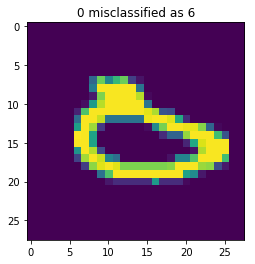

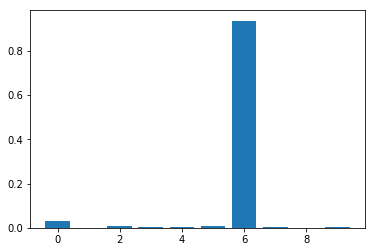

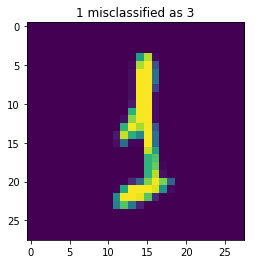

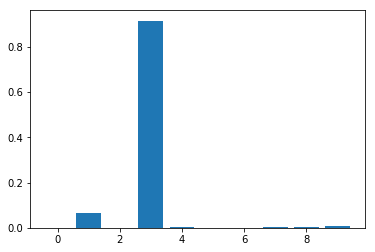

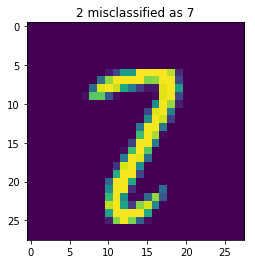

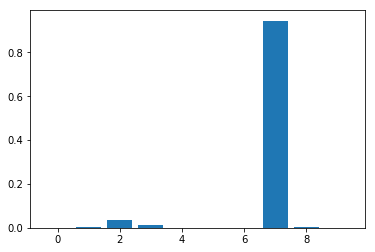

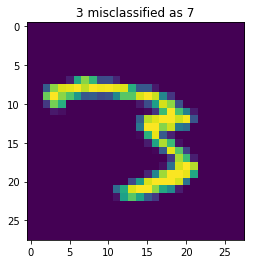

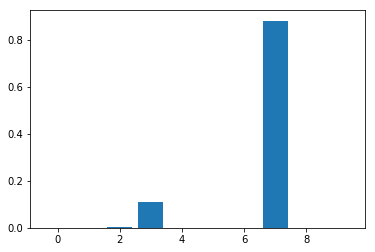

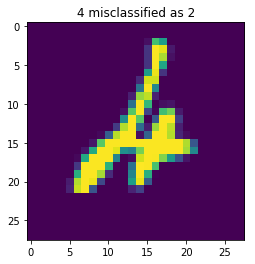

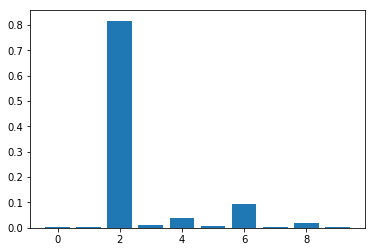

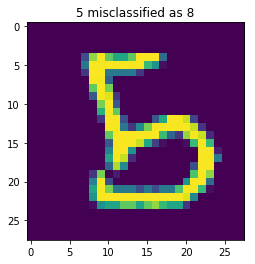

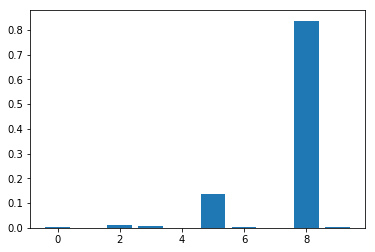

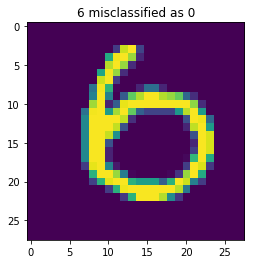

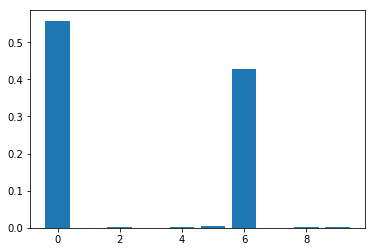

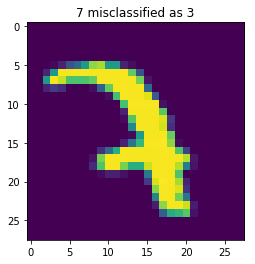

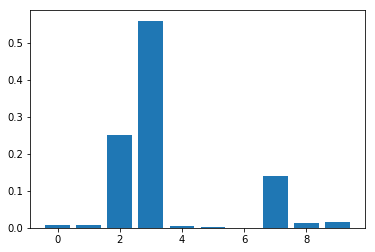

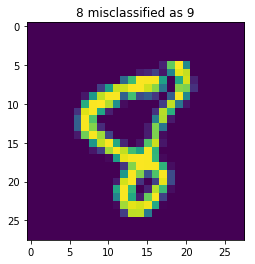

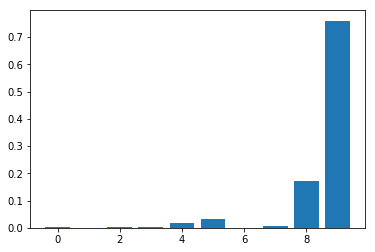

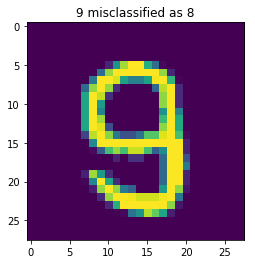

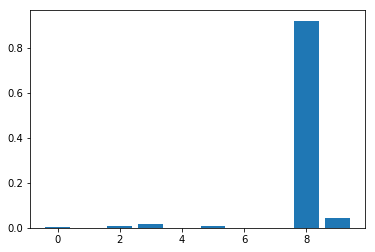

In [92]:
import matplotlib.pyplot as plt
import matplotlib

#find misclassified
def fm(c, labels, preds):
    for i in range(len(preds)):
        if c == labels[i]:
            if preds[i] != labels[i]:
                return i
            
for i in range(10):
    idx = fm(i, y_test, pred_log)
    plt.imshow(x_test[idx].reshape(28,28)) 
    plt.title(str(y_test[idx]) + " misclassified as " + str(pred_log[idx]))
    plt.show()
    plt.bar( list(range(10)),logReg.predict_proba(X_test_meta[idx:idx+1])[0])
    plt.show()
    
    #plt.figure(i+1)
  